Task 2

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

df = pd.read_excel(r'/content/loan_approval_dataset.xlsx')
df.columns

Index(['ID', 'AGE', 'JOB_STATUS', 'OWNS_HOUSE', 'CREDIT_RATING', 'CLASS'], dtype='object')

In [29]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df.drop('CLASS',axis=1))
y = df['CLASS']


In [30]:
dt = DecisionTreeClassifier(criterion='entropy')
modeldt = dt.fit(X,y)

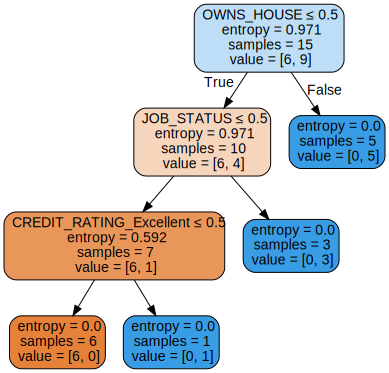

In [32]:
dot_data = export_graphviz(dt,
               feature_names=list(X.columns),
               filled=True, rounded =True,
                              special_characters=True)

graph = graphviz.Source(dot_data)
graph


Task 3

In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'/content/cancer patient data sets (1).csv')
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [52]:
df['Level'].value_counts()

,count
Level,
High,365
Medium,332
Low,303


In [53]:
df.isnull().sum()

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
df.head(5)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [56]:
df = df.drop('Patient Id',axis=1)
X = df.drop('Level',axis=1)
y = df['Level']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train_val,X_val,y_train_val,y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=0)


We use a validation set to tune hyperparameters and check model performance before final testing.

This prevents overfitting and ensures better generalization.


In [58]:
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(criterion='entropy')
modeldt = dt.fit(X_train_val,y_train_val)

train_acc = accuracy_score(y_train_val, dt.predict(X_train_val))
val_acc = accuracy_score(y_val, dt.predict(X_val))

In [59]:
test_acc = accuracy_score(y_test, dt.predict(X_test))

In [60]:
print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 1.0
Validation Accuracy: 1.0
Testing Accuracy: 1.0


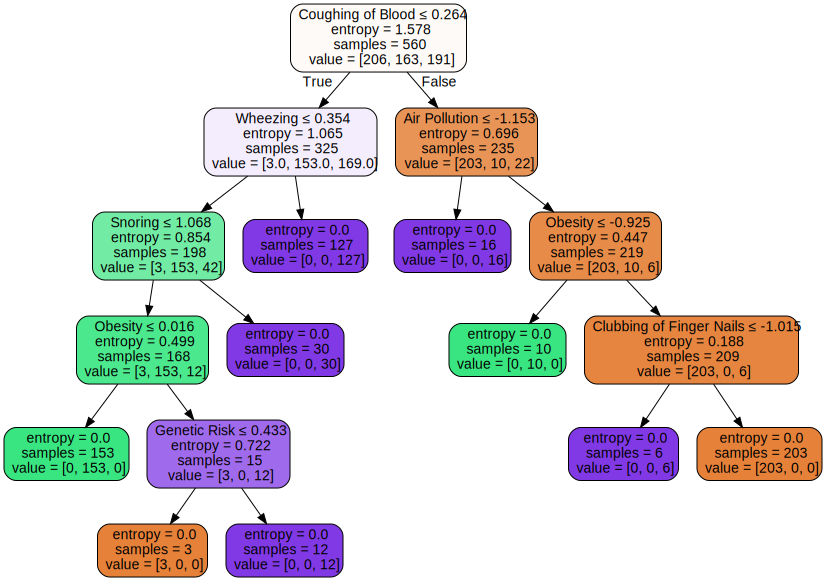

In [64]:
feature_names = df.drop("Level", axis=1).columns

dot_data = export_graphviz(dt,
                           feature_names=feature_names,
                           filled = True,
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph

Task 4

In [69]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

df = pd.read_csv(r'/content/student_course_dataset.csv')
df.columns

Index(['Student', 'Prior_Experience', 'Course', 'Time', 'Liked'], dtype='object')

In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for cols in df.columns:
  if df[cols].dtype =='object':
    df[cols]=le.fit_transform(df[cols])

X = df.drop('Liked',axis=1)
y = df['Liked']

In [71]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=1)
dt.fit(X,y)

DecisionTreeClassifier(max_depth=1)

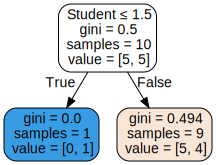

In [72]:
dot_data = export_graphviz(dt,
                           feature_names = list(X.columns),
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph